<a href="https://colab.research.google.com/github/MPoonkodi/fiip-healthcare/blob/main/diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import tensorflow as tf

sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

 READ DATASET

In [3]:
df=pd.read_csv('/content/diabetes_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()



,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

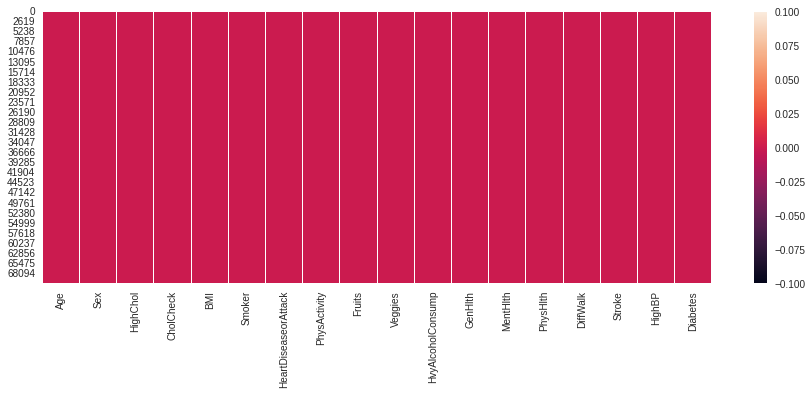

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna())

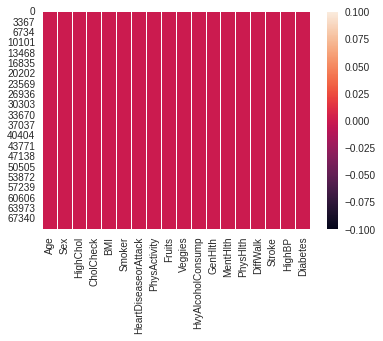

In [ ]:
sns.heatmap(df.isna())


In [ ]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [4]:
X=df.drop(['Diabetes'],axis=1)
y=df['Diabetes']


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.20,random_state=42,stratify=y_train)

In [6]:
X_test.values[0],y_test.values[0]

(array([10.,  0.,  1.,  1., 53.,  0.,  0.,  0.,  0.,  1.,  0.,  4.,  0.,
         5.,  1.,  0.,  1.]), 1.0)

In [7]:
batch_size=512

In [8]:
data_tf_tr=tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_tr_batches = data_tf_tr.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_val=tf.data.Dataset.from_tensor_slices((X_val, y_val))
data_val_batches = data_tf_val.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_tre_eval=tf.data.Dataset.from_tensor_slices((X_test,y_test))
data_tre_batches_eval = data_tf_tre_eval.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [9]:
data_tf_tre=tf.data.Dataset.from_tensor_slices(X_test)
data_tre_batches = data_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)


Scaling the data so that comparatively larger values do not make the model biased

In [10]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

In [12]:
accuracy_list = {'Diabetes':{'Logistic Regression':0,'Gaussian Naive Bayes':0,"Bernoulli Naive Bayes":0,'KNN':0,'Decision Tree':0}}

Defining a function to standardize the model testing process

In [13]:
def model_train_test(name,model_name,model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    cm = metrics.confusion_matrix(y_test,y_pred)
    
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 8),cmap='flare')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix ')
    plt.show()
    report = round(metrics.accuracy_score(y_test,y_pred)*100)
    accuracy_list[name][model_name] = report
    print("Accuracy of the model: {:.2f} %".format(report))
    print("\n\n\n\n")
    print('ROC-AUC\n')
    visualizer = ROCAUC(model, classes=["No", "Yes"])

    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show() 
    

In [14]:
def plot_bar(name):
    keys = list(accuracy_list[name].keys())
    values = list(accuracy_list[name].values())
    fig = plt.figure(figsize =(10, 7))
    plt.bar(keys, values, color =['#132A13','#31572C','#4F772D','#90A955','#90A955'],width = 0.4)
    plt.show()

Testing Different Models- LOGESTIC REGRESSION

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7070
         1.0       0.74      0.76      0.75      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



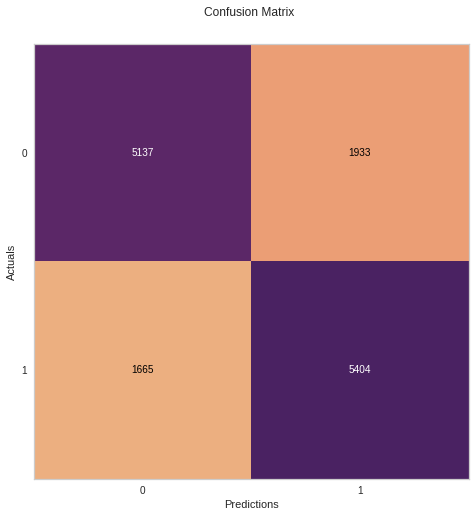

Accuracy of the model: 75.00 %





ROC-AUC



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


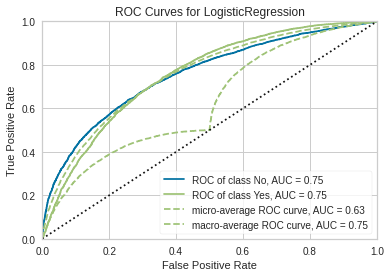

In [15]:
logreg=LogisticRegression()
 
model_train_test('Diabetes','Logistic Regression',logreg)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=nan total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=nan total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=nan total time=   0.0s
[CV 3/5] END colsample_bytree=0.7, gamma=0

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 728, in fit
    self._Booster = train(xgb_options, train_dmatrix, self.get_num_boosting_rounds(),
  File "/usr/local/lib/python3.8/dist-packages/xgboost/training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "/usr/loca

XGBoostError: ignored

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72      7070
         1.0       0.72      0.72      0.72      7069

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



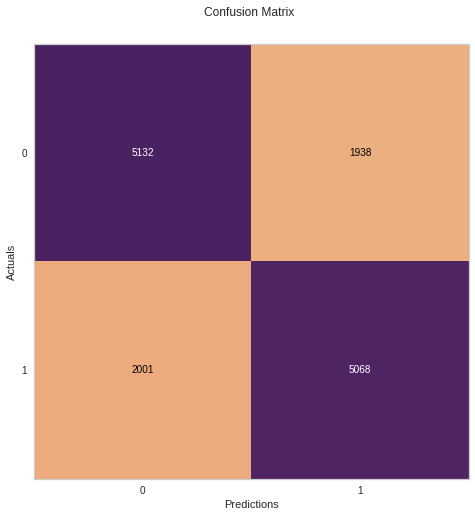

Accuracy of the model: 72.00 %





ROC-AUC



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


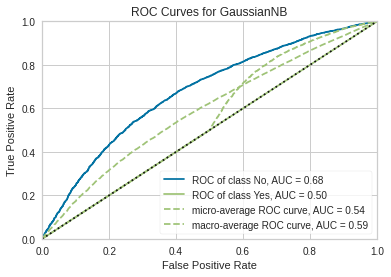

In [16]:
gnb=GaussianNB()
model_train_test('Diabetes','Gaussian Naive Bayes',gnb)


In [17]:
fig = go.Figure(data=[go.Table(
                                
                                header=dict(values=['Model',
                                                    'Precision','Recall','Accuracy'],
                                line_color='#010101',
                                fill_color=' #2980b9',line_width=3,
                                align='center',
                                font=dict(color="black", size=20)),
    
                                cells=dict(values=[('Logistic Regression','Decision Tree','Random Forest','XGboost'),
                                                   ("{:.2f}".format(metrics.precision_score(test_labels, yhat_lr, pos_label=1)),
                                                    "{:.2f}".format(metrics.precision_score(test_labels, yhat_dectree, pos_label=1)),
                                                   "{:.2f}".format(metrics.precision_score(test_labels, y_pred_rf, pos_label=1)),
                                                   "{:.2f}".format(metrics.precision_score(test_labels, Y_pred_xgboost, pos_label=1))),
                                                  
                                                  ("{:.2f}".format(metrics.recall_score(test_labels, yhat_lr, pos_label=1)),
                                                  "{:.2f}".format(metrics.recall_score(test_labels, yhat_dectree, pos_label=1)),
                                                  "{:.2f}".format(metrics.recall_score(test_labels, y_pred_rf, pos_label=1)),
                                                  "{:.2f}".format(metrics.recall_score(test_labels, Y_pred_xgboost, pos_label=1))),
                                                  
                                                  ("{:.2f}".format(metrics.accuracy_score(test_labels, yhat_lr)),
                                                   "{:.2f}".format(metrics.accuracy_score(test_labels, yhat_dectree)),
                                                   "{:.2f}".format(metrics.accuracy_score(test_labels, y_pred_rf)),
                                                   "{:.2f}".format(metrics.accuracy_score(test_labels, Y_pred_xgboost)))],
                                fill_color=' #d4e6f1',line_color='#010101',line_width=3,
                                           align='center',
                                font=dict(color="#1f1f1f", size=20),height=40) 
)])

fig.update_layout(width=900, height=400,font=dict(
        family="Courier New, monospace"))
fig.show()

NameError: ignored

BERNOULLI NAIVE BAYES



              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      7070
         1.0       0.73      0.73      0.73      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



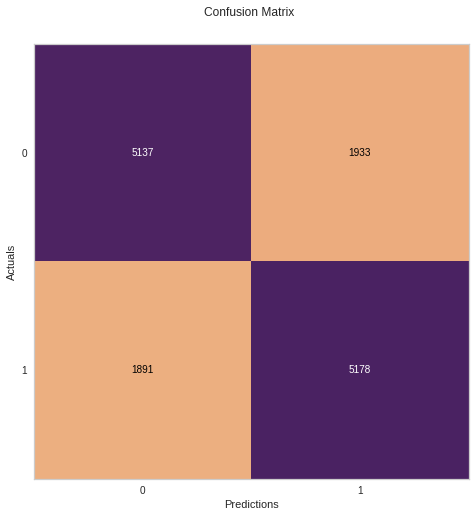

Accuracy of the model: 73.00 %





ROC-AUC



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


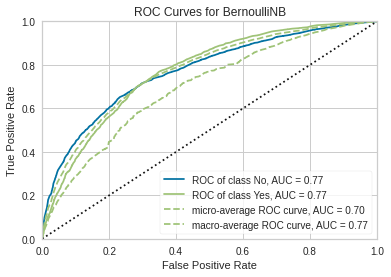

In [ ]:
bnb=BernoulliNB()
model_train_test('Diabetes','Bernoulli Naive Bayes',bnb)

K-NEAREST NEIGHBOURS

In [ ]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


Fitting 10 folds for each of 19 candidates, totalling 190 fits

In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
{'n_neighbors': 19}

{'n_neighbors': 19}
Accuracy for our training dataset with tuning is : 73.64%


{'n_neighbors': 19}

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      7070
         1.0       0.71      0.79      0.75      7069

    accuracy                           0.73     14139
   macro avg       0.74      0.73      0.73     14139
weighted avg       0.74      0.73      0.73     14139



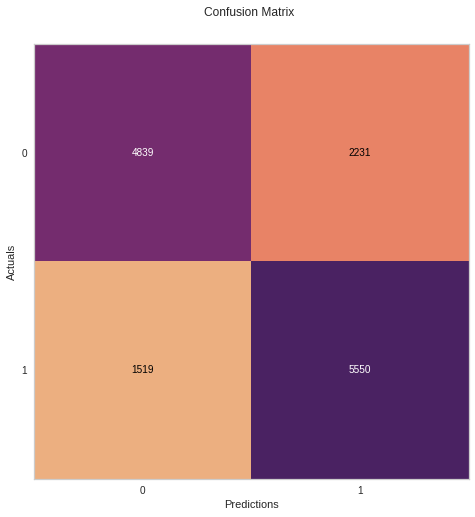

Accuracy of the model: 73.00 %





ROC-AUC



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


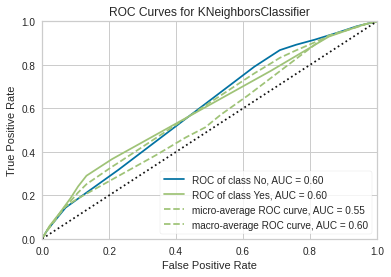

In [ ]:
model_train_test('Diabetes','KNN',KNeighborsClassifier(n_neighbors=19))

DECISION TREE

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      7070
         1.0       0.70      0.78      0.74      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



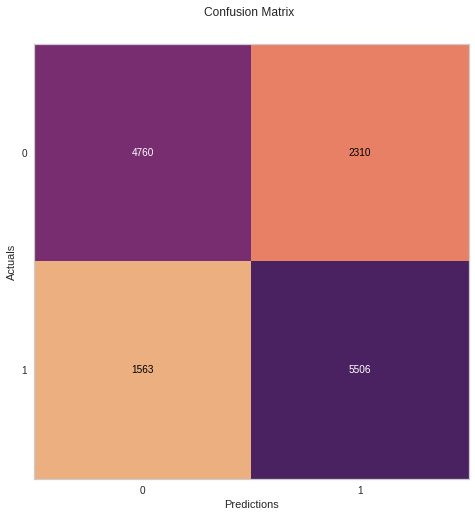

Accuracy of the model: 73.00 %





ROC-AUC



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


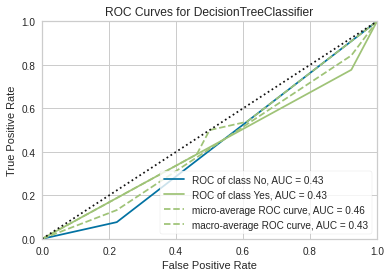

In [ ]:
model_train_test('Diabetes','Decision Tree',DecisionTreeClassifier(ccp_alpha=0.001,criterion='entropy',max_depth=9,max_features='auto'))

ARTIFICAL NEURAL NETWORK

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
X=df.drop('Diabetes',axis=1).values### independent features
y=df['Diabetes'].values###dependent features

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=17,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [ ]:
torch.manual_seed(20)
model=ANN_Model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=17, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs=10
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.8216264843940735


In [ ]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

Streaming output truncated to the last 5000 lines.
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
1
1
1
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
1
0
1
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
1
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[5916, 1016],
       [4865, 2342]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.5840582785204046

Text(69.0, 0.5, 'Predicted Values')

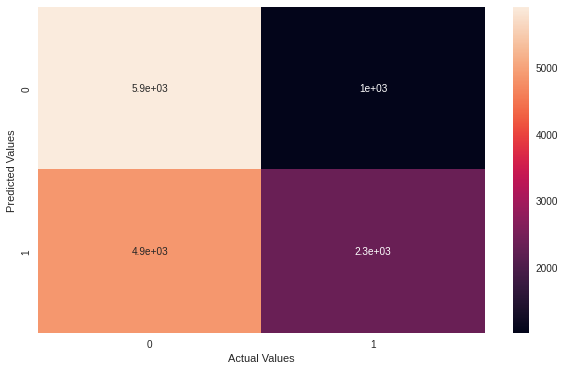

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.5840582785204046

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
clf.fit(X_train, y_test)

ValueError: ignored

In [ ]:
fig = go.Figure(data=[go.Table(
                                
                                header=dict(values=['Model',
                                                    'Precision','Recall','Accuracy'],
                                line_color='#010101',
                                fill_color=' #2980b9',line_width=3,
                                align='center',
                                font=dict(color="black", size=20)),
    
                                cells=dict(values=[('Logistic Regression','Decision Tree','Random Forest','XGboost'),
                                                   ("{:.2f}".format(metrics.precision_score(test_labels, yhat_lr, pos_label=1)),
                                                    "{:.2f}".format(metrics.precision_score(test_labels, yhat_dectree, pos_label=1)),
                                                   "{:.2f}".format(metrics.precision_score(test_labels, y_pred_rf, pos_label=1)),
                                                   "{:.2f}".format(metrics.precision_score(test_labels, Y_pred_xgboost, pos_label=1))),
                                                  
                                                  ("{:.2f}".format(metrics.recall_score(test_labels, yhat_lr, pos_label=1)),
                                                  "{:.2f}".format(metrics.recall_score(test_labels, yhat_dectree, pos_label=1)),
                                                  "{:.2f}".format(metrics.recall_score(test_labels, y_pred_rf, pos_label=1)),
                                                  "{:.2f}".format(metrics.recall_score(test_labels, Y_pred_xgboost, pos_label=1))),
                                                  
                                                  ("{:.2f}".format(metrics.accuracy_score(test_labels, yhat_lr)),
                                                   "{:.2f}".format(metrics.accuracy_score(test_labels, yhat_dectree)),
                                                   "{:.2f}".format(metrics.accuracy_score(test_labels, y_pred_rf)),
                                                   "{:.2f}".format(metrics.accuracy_score(test_labels, Y_pred_xgboost)))],
                                fill_color=' #d4e6f1',line_color='#010101',line_width=3,
                                           align='center',
                                font=dict(color="#1f1f1f", size=20),height=40) 
)])

fig.update_layout(width=900, height=400,font=dict(
        family="Courier New, monospace"))
fig.show()